In [84]:
%load_ext autoreload
%autoreload 2

from utils.load import *
from utils.sampling import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Weather Station Information

In [61]:
weather_station_df = load_weather_station_dataset(dataset_name='weather_station_data.csv')
cols = list(weather_station_df.columns)
cols.remove('time_sgt')
cols.remove('gid')
weather_station_df_pivot = pd.pivot(data=weather_station_df, index='time_sgt', columns='gid', values=cols)
weather_station_df_counts = weather_station_df_pivot.count().reset_index()

weather_station_info = pd.pivot(data=weather_station_df_counts, index='gid', columns = 'level_0')

pd.set_option('display.max_rows', None)

print(weather_station_info.sort_index()) 
print(weather_station_info.astype(bool).sum())

                      0                                                      
level_0 air_temperature rain_rate relative_humidity wind_direction wind_speed
gid                                                                          
S06               13679     13840             13679          13489      13678
S07                   0     21520                 0              0          0
S08                   0     26093                 0              0          0
S102               2106      2110              2106           2101       2107
S104              21228     21523             21228          20324      20466
S106              22776     23667             22779          22683      22763
S107              25312     26093             25312          25173      25311
S109              21939     22405             21939          21899      21940
S111              23723     24402             23723          23443      23723
S112                  0     26093                 0             

# Station Locations

In [67]:
station_locations = get_station_coordinate_mappings()

print(len(station_locations))

63


{'S224': (1.34392, 103.98409), 'S77': (1.2937, 103.8125), 'S216': (1.36019, 103.85335), 'S109': (1.3764, 103.8492), 'S217': (1.35041, 103.85526), 'S64': (1.3824, 103.7603), 'S90': (1.3191, 103.8191), 'S208': (1.3136, 104.00317), 'S201': (1.32311, 103.76714), 'S50': (1.3337, 103.7768), 'S220': (1.38666, 103.89797), 'S213': (1.32427, 103.8097), 'S107': (1.3135, 103.9625), 'S215': (1.32785, 103.88899), 'S222': (1.28987, 103.82364), 'S221': (1.35691, 103.89088), 'S33': (1.3081, 103.71), 'S229': (1.35167, 103.72195), 'S228': (1.34703, 103.70073), 'S71': (1.2923, 103.7815), 'S43': (1.3399, 103.8878), 'S211': (1.42918, 103.75711), 'S66': (1.4387, 103.7363), 'S112': (1.43854, 103.70131), 'S07': (1.3415, 103.8334), 'S226': (1.27472, 103.80389), 'S40': (1.4044, 103.78962), 'S223': (1.29984, 103.80264), 'S113': (1.30648, 103.9104), 'S44': (1.34583, 103.68166), 'S119': (1.30105, 103.8666), 'S121': (1.37288, 103.72244), 'S203': (1.29164, 103.7702), 'S29': (1.387, 103.935), 'S94': (1.3662, 103.9528)

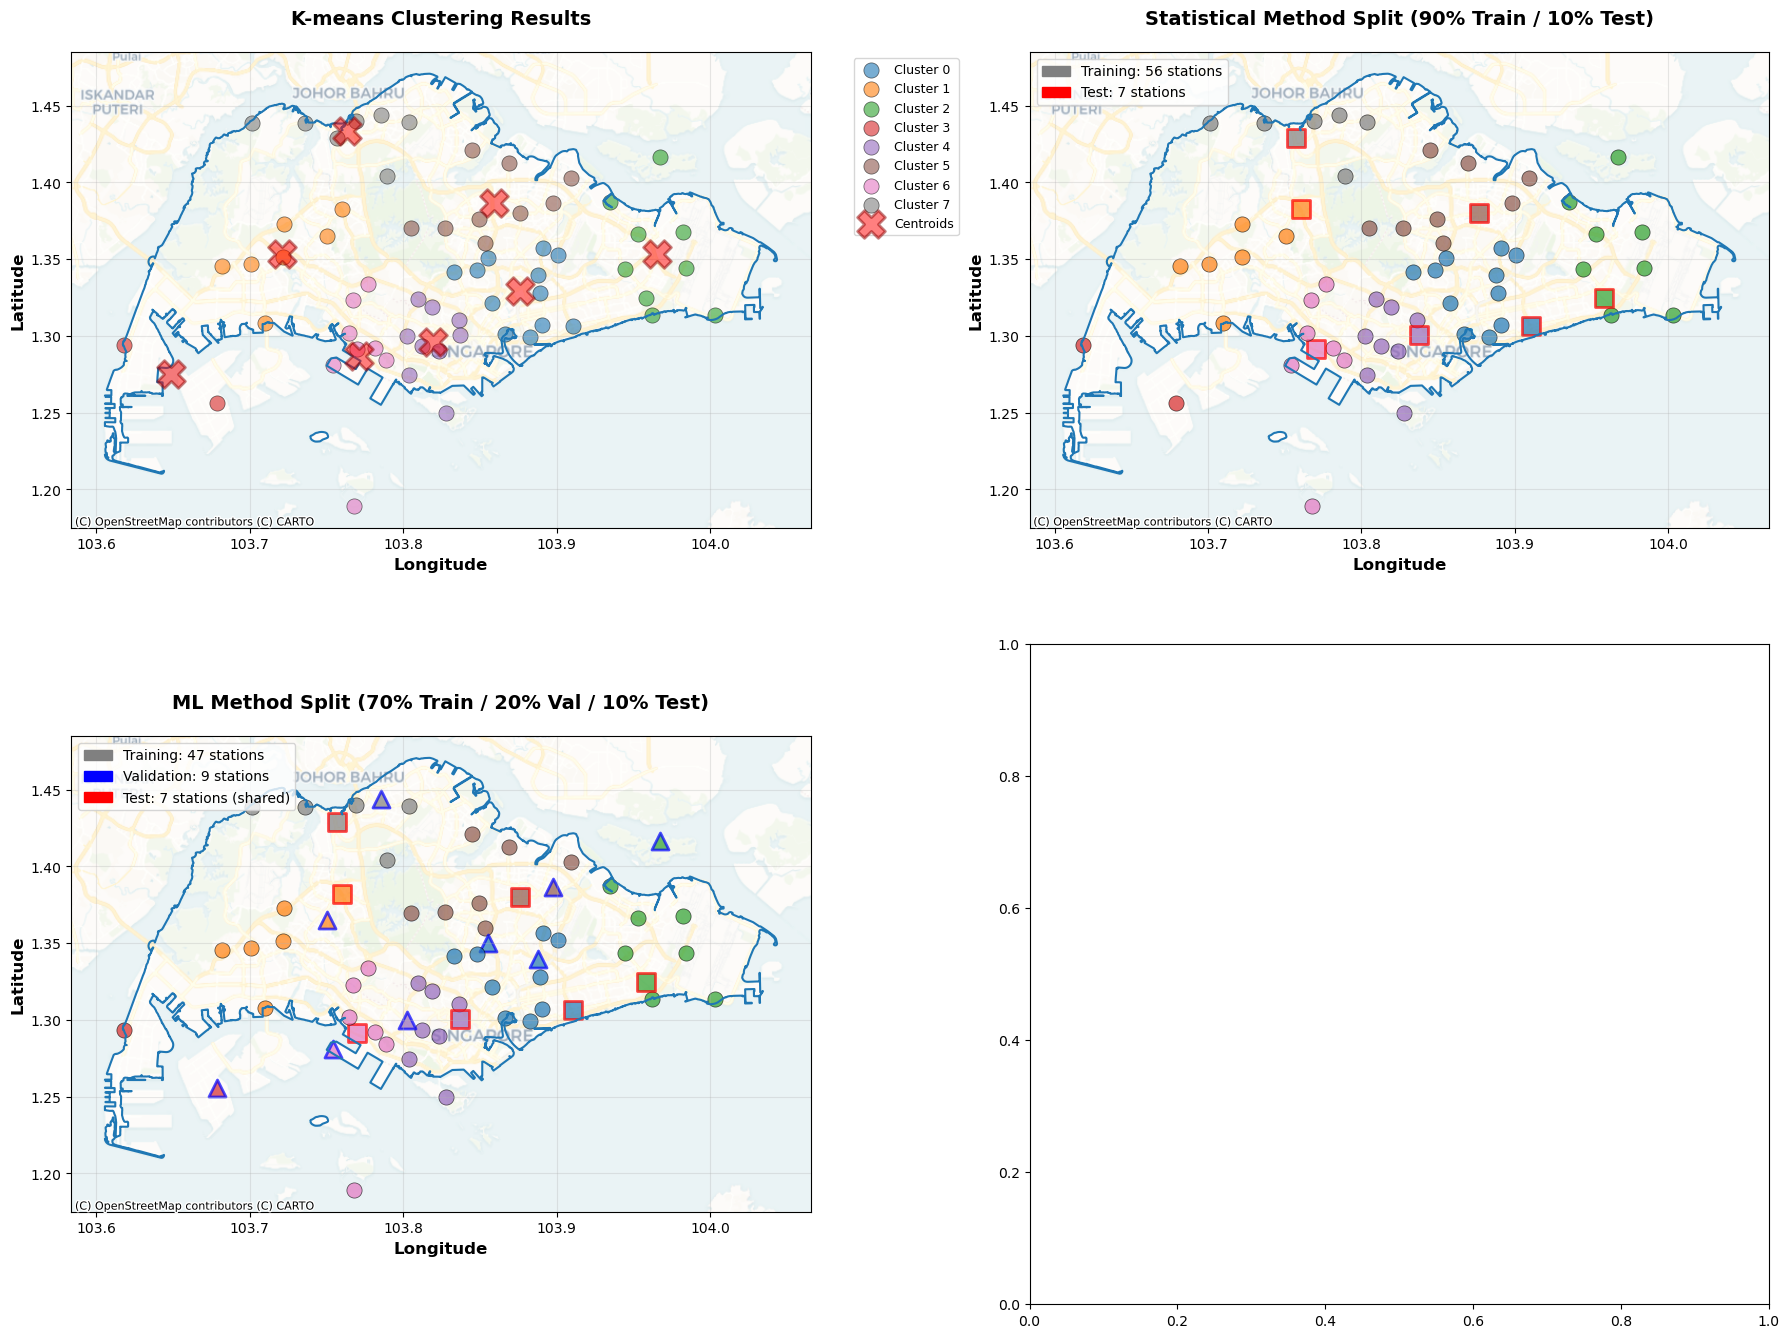

{'statistical': {'train': array(['S217', 'S07', 'S88', 'S214', 'S78', 'S123', 'S43', 'S215', 'S119',
       'S06', 'S221', 'S121', 'S229', 'S228', 'S33', 'S44', 'S218',
       'S208', 'S224', 'S84', 'S94', 'S106', 'S29', 'S24', 'S107', 'S117',
       'S115', 'S111', 'S77', 'S90', 'S223', 'S222', 'S60', 'S226',
       'S213', 'S109', 'S216', 'S900', 'S08', 'S209', 'S69', 'S81',
       'S220', 'S102', 'S71', 'S50', 'S92', 'S230', 'S201', 'S116',
       'S227', 'S104', 'S112', 'S40', 'S210', 'S66'], dtype='<U4'), 'test': array(['S113', 'S64', 'S207', 'S79', 'S219', 'S203', 'S211'], dtype='<U4')}, 'ml': {'train': array(['S06', 'S88', 'S119', 'S78', 'S07', 'S123', 'S214', 'S221', 'S215',
       'S44', 'S33', 'S229', 'S228', 'S121', 'S208', 'S84', 'S24', 'S94',
       'S107', 'S224', 'S29', 'S115', 'S90', 'S226', 'S222', 'S213',
       'S111', 'S60', 'S77', 'S900', 'S209', 'S08', 'S109', 'S81', 'S216',
       'S69', 'S71', 'S201', 'S102', 'S92', 'S230', 'S50', 'S112', 'S40',
       'S210', '

In [92]:
print(station_locations)

output = stratified_spatial_sampling_dual(station_locations, random_state=123)
print(output)